In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-03 14:09:51,395 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
from kid_readout.analysis.resonator import find_resonators

In [4]:
ncf = NCFile('/data/readout/2016-10-03_135901_vna_dac_atten_40.0_dB.nc',cache_s21_raw=True)

In [5]:
swa = ncf.SweepArray0

In [43]:
CRYOSTAT

'STARCryo'

In [45]:
swa.start_epoch

<bound method SweepArray.start_epoch of <kid_readout.measurement.basic.SweepArray object at 0x7ff1442ee450>>

In [41]:
swa._io.metadata.cooldown

StateDict({u'is_dark': True, u'chip_id': u'TwoLayer02-0303', u'optical_state': u'dark', u'description': u'Stanford TwoLayer02-0303 hybrid Al-Nb eight-LEKID chip in dark package H3+L3, taped.', u'date': u'2016-08-10', u'thermometry_config': StateDict({u'load': 1, u'package': 9})})

<IPython.core.display.Javascript object>


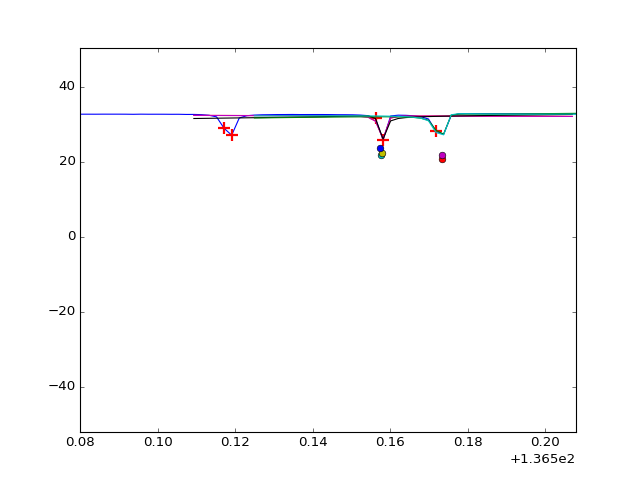

INFO     2016-10-03 14:10:22,302 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 126270707.7  126226267.0
INFO     2016-10-03 14:10:31,896 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 142458850.8  142482850.4
INFO     2016-10-03 14:10:33,630 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 146401132.1  146431820.1


In [6]:
figure()
raw = find_resonators.find_resonators(swa.frequency,swa.s21_point,swa.s21_point_error,frequency_span=50e3,make_plot=True,)

In [7]:
len(raw)

148

In [21]:
uniq = find_resonators.remove_duplicates(raw,tolerance=50e3)

found duplicate of  121737011.917 distance 3.50545932353
found duplicate of  121737007.32 distance 8.10239483416
found duplicate of  121737009.236 distance 6.18648068607
found duplicate of  123100334.632 distance 0.0106877982616
found duplicate of  125502971.6 distance 0.189269274473
found duplicate of  125873039.797 distance 0.791490256786
found duplicate of  126025851.895 distance 0.402599588037
found duplicate of  126270634.35 distance 44252.391507
found duplicate of  129431353.094 distance 0.325308009982
found duplicate of  131432128.683 distance 0.35704228282
found duplicate of  131634748.09 distance 0.16390542686
found duplicate of  133185596.194 distance 0.577072650194
found duplicate of  133278818.924 distance 0.742146804929
found duplicate of  133789775.24 distance 0.452506661415
found duplicate of  134620865.191 distance 14.997618854
found duplicate of  134620861.939 distance 18.2496950328
found duplicate of  134620873.204 distance 6.98452872038
found duplicate of  134620872.

In [22]:
f0 = np.array([res.f_0 for res in uniq])

In [27]:
np.save('/data/readout/resonances/2016-10-03-jpl-lf-2-crude-initial-resonator-list.npy',f0)

In [33]:
30e3/(512e6/2**18)

15.36

In [ ]:
16

In [23]:
np.diff(f0).min()

59082.164809703827

<IPython.core.display.Javascript object>


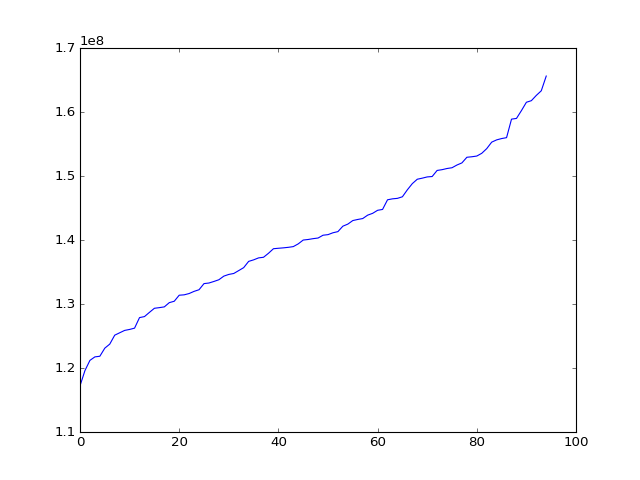

In [26]:
figure()
plot(f0)

<IPython.core.display.Javascript object>


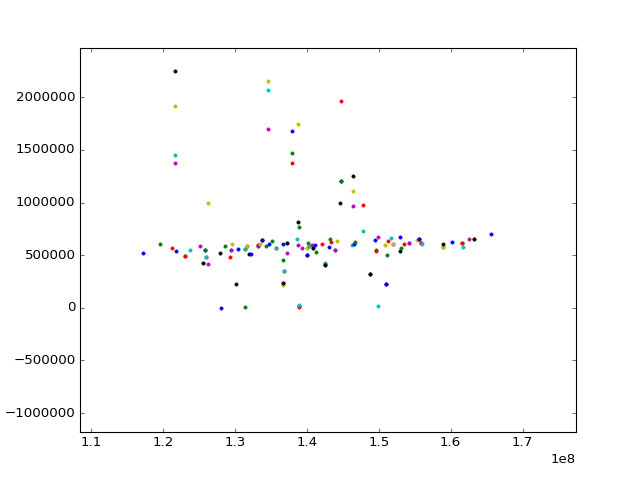

In [16]:
figure()
for res in raw:
    plot(res.f_0,res.Q_i,'.')

In [53]:
res = raw[-1]
s21 = res.data[4:-4]
fr = res.frequency[4:-4]
err = res.errors[4:-4]

In [8]:
from kid_readout.analysis.resonator import lmfit_resonator

<IPython.core.display.Javascript object>


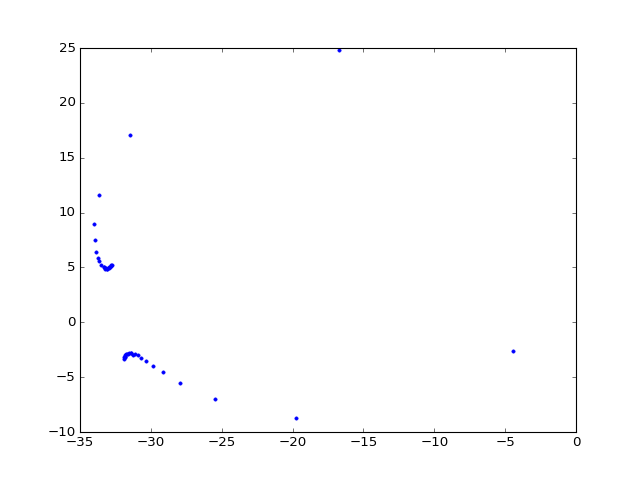

In [54]:
figure()
plot_ri(s21,'.')

In [65]:
res = lmfit_resonator.LinearResonatorWithCable(fr,np.conj(s21),err)

In [55]:
res.current_params=res.model.guess(np.conj(s21),f=fr,verbose=True,Q_max=1e5,Q=3e4,Q_e_real=51e3,Q_e_imag=10e3,delay=0)
res.fit()

fmin= 165576171.875 fmax= 165658203.125 f_0_guess= 165617187.5
Qmin= 201.895238095 Q_max= 84796.0 Q_guess= 4137.62112929 Q_e_real_guess= 4836.00142258


In [66]:
print res.current_result.fit_report()

[[Model]]
    (Model(general_cable) * Model(linear_resonator))
[[Fit Statistics]]
    # function evals   = 149
    # data points      = 86
    # variables        = 8
    chi-square         = 218.766
    reduced chi-square = 2.805
    Akaike info crit   = 104.691
    Bayesian info crit = 124.326
[[Variables]]
    delay:     -3.7659e-07 +/- 1.44e-09 (0.38%) (init=-7.606492e-07)
    phi:        3.07071561 +/- 0.000433 (0.01%) (init= 2.980966)
    f_min:      1.655762e+08 (fixed)
    A_mag:      32.6438761 +/- 0.014005 (0.04%) (init= 30.01947)
    A_slope:   -1.1220e-08 +/- 8.97e-09 (79.95%) (init= 1.220408e-06)
    f_0:        1.6562e+08 +/- 2.914794 (0.00%) (init= 1.656172e+08)
    Q:          52370.9956 +/- 95.62800 (0.18%) (init= 4137.621)
    Q_e_real:   45613.9129 +/- 64.91580 (0.14%) (init= 4836.001)
    Q_e_imag:   22684.2591 +/- 65.52201 (0.29%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(A_mag, A_slope)            = -0.863 
    C(delay, phi)           

<IPython.core.display.Javascript object>


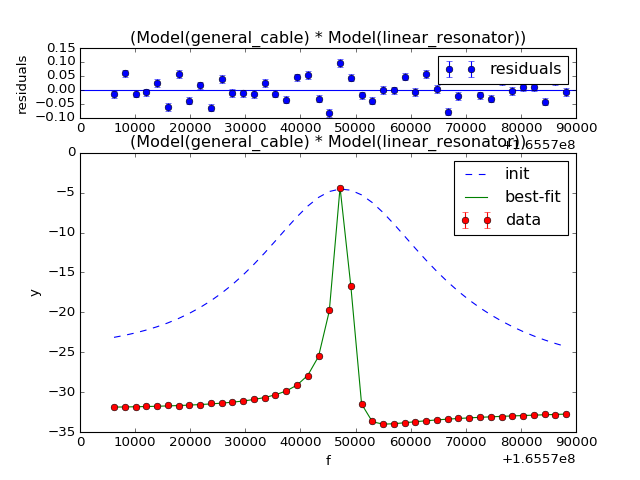

In [68]:
_=res.current_result.plot()

In [50]:
res.current_params

Parameters([('delay',
             <Parameter 'delay', -3.7860134432607562e-07, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', -1.0035124541563594, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=117173828.125 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 43.922253275002042, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -2.0278772902161252e-08, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 117216755.60765474, bounds=[117173828.125:117255859.375]>),
            ('Q',
             <Parameter 'Q', 20217.387487291049, bounds=[142.89047619047619:100000.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 19003.144321415923, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', 6231.8208505455405, bounds=[-10000000.0:10000000.0]>)])

<IPython.core.display.Javascript object>


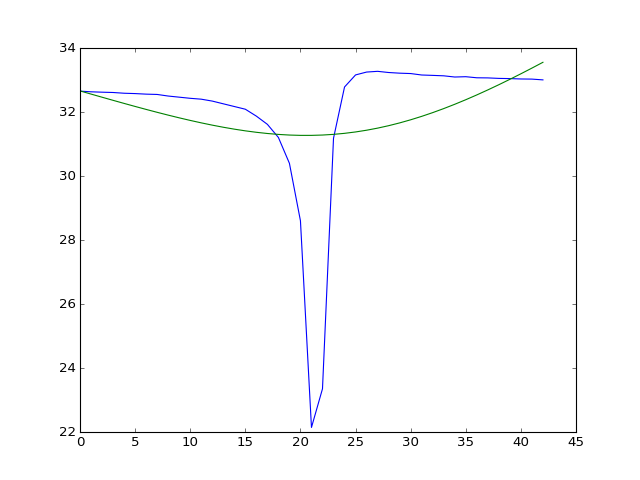

In [15]:
figure()
plot(dB(res.data))
plot(dB(res.eval()))

<IPython.core.display.Javascript object>


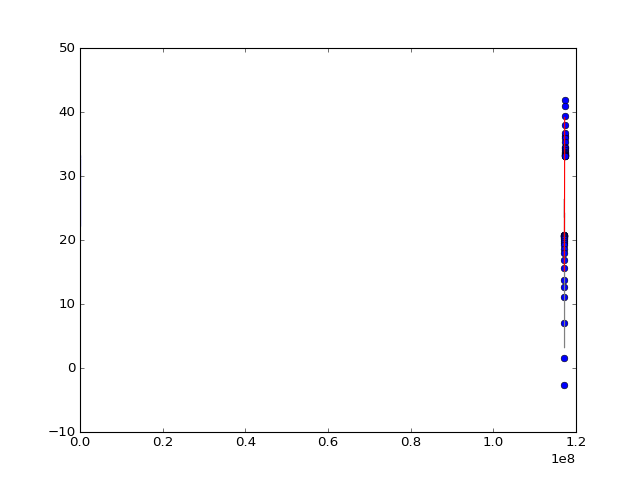

In [12]:
res.plot()

In [86]:
p0 = res.model.guess(s21,f=fr,delay_min=-1e-6,delay_max=1e-6,Q_min=8000,Q_max=1000e3)

In [87]:
p0

Parameters([('delay',
             <Parameter 'delay', 8.3739631030903666e-07, bounds=[-1e-06:1e-06]>),
            ('phi',
             <Parameter 'phi', 0.24772534890136877, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=125472656.25 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 15.013819170933141, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', 4.1675093861324183e-07, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 125503906.25, bounds=[125472656.25:125535156.25]>),
            ('Q', <Parameter 'Q', 8000, bounds=[8000:1000000.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 7904.6452455183162, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', 0, bounds=[-10000000.0:10000000.0]>)])

In [88]:
res.current_params=p0

In [89]:
res.fit()

In [63]:
fr.max()

125535156.25

In [96]:
res.current_params

Parameters([('delay',
             <Parameter 'delay', 8.3741763372170694e-07, bounds=[-1e-06:1e-06]>),
            ('phi',
             <Parameter 'phi', 0.24772578934203837, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=125472656.25 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 15.013814731077797, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', 4.167498512422706e-07, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 125503906.26473778, bounds=[125472656.25:125535156.25]>),
            ('Q',
             <Parameter 'Q', 999819.10647571506, bounds=[8000:1000000.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 7904.8591956582604, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', -0.0014843475073575974, bounds=[-10000000.0:10000000.0]>)])

<IPython.core.display.Javascript object>


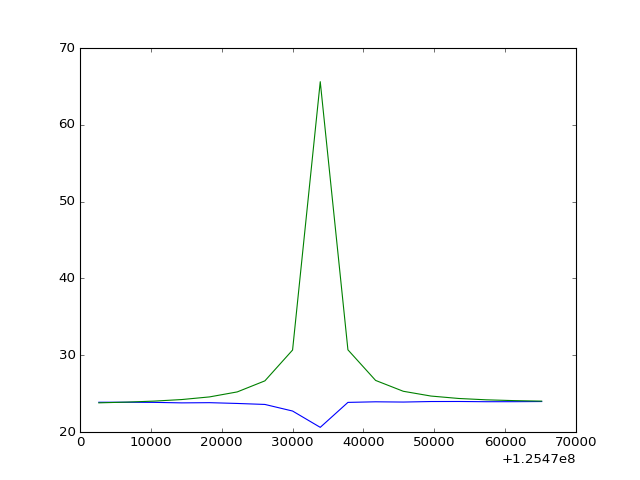

In [95]:
figure()
plot(res.frequency,dB(res.data))
plot(res.frequency,dB(res.model.eval(f=res.frequency,params=res.current_params)))